## Importing the Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## Data Collection and Processing

---



To load a CSV file to a Pandas DataFrame in Colab, you can follow these steps:

Mount your Google Drive to Colab by running the following code snippet:



```
from google.colab import drive
drive.mount('/content/gdrive')

```

After mounting your Google Drive, you can access your files by navigating to the left pane (file explorer) and right-clicking on the file that you need to import. Then, select “Copy path”.



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# loading the csv data to a Pandas DataFrame
# YOUR CODE STARTS HERE
df = pd.read_csv("/content/heart_disease_data1.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# print first 5 rows of the dataset

# YOUR CODE STARTS HERE
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# print last 5 rows of the dataset
# YOUR CODE STARTS HERE
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
# YOUR CODE STARTS HERE
print(f"It has {df.shape[0]} rows and {df.shape[1]} columns")

It has 303 rows and 14 columns


In [ ]:
# getting some info about the data
# YOUR CODE STARTS HERE
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [ ]:
# checking for missing values
# YOUR CODE STARTS HERE
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
# YOUR CODE STARTS HERE
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


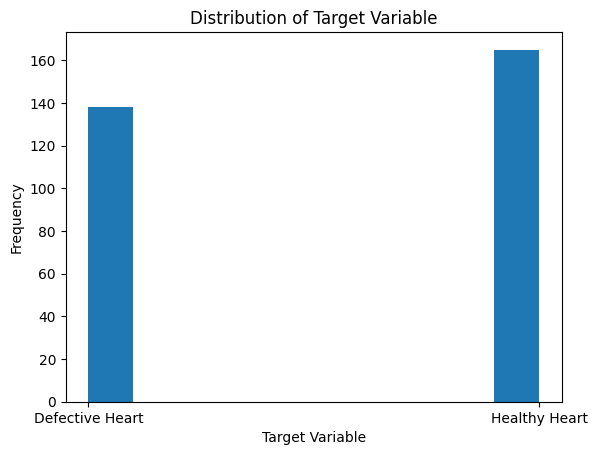

In [ ]:
import matplotlib.pyplot as plt

# Plotting a histogram of the target variable
plt.hist(df['target'])
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')

# Customizing the x-axis labels
bin_names = ['Defective Heart', 'Healthy Heart']
plt.xticks([0, 1], bin_names)

plt.show()


1 --> Defective Heart

0 --> Healthy Heart

### Splitting the Features and Target

---

When working with a dataset, it is common to split the data into two sets: a set of features (X) and a target variable (y). The features are the independent variables that are used to predict the target variable. The target variable is the dependent variable that we want to predict.




In [ ]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]



In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


### Splitting the Data into Training data & Test Data

---

Splitting the data into training and test sets is a common procedure in machine learning. It allows us to evaluate the performance of a model on unseen data, and avoid overfitting or underfitting. There are different methods to split the data into training and test sets, depending on the programming language and the library you use.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


# Bonus Questions

## Model Training


### Logistic Regression [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

---

#### What is Logistic Regression?

The logistic regression statistic modeling technique is used when we have a
binary outcome variable. For example: given the parameters, will the student pass or fail? Will it rain or not? etc.

So, though we may have continuous or categorical independent variables, we can use the logistic regression modeling technique to predict the outcome when the outcome variable is binary.

In [ ]:

model = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
# Training the LogisticRegression model with training data
model.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

## Model Evaluation

### Accuracy Score [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)

---

Accuracy score is a metric used to evaluate the performance of a classification model. It is defined as the ratio of the number of correct predictions to the total number of predictions made by the model. In other words, it measures how well the model can correctly classify the data points 123.

The accuracy score is calculated using the following formula:


```
  accuracy = (number of correct predictions) / (total number of predictions)
```


The output is a value between 0 and 1, where 1 indicates that the model has made all correct predictions and 0 indicates that it has made no correct predictions.

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)


training_data_accuracy = accuracy_score(Y_train, X_train_prediction)



In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8688524590163934


### Building a Predictive System

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data = np.array(input_data)
# reshape the numpy array as we are predicting for only on instance
input_data = input_data.reshape(1, -1)
# prediction
prediction = model.predict(input_data)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Genetic Algorithm Implementation

---

#### To implement a genetic algorithm (GA) to a logistic regression problem, you can follow these steps:

1. Initialize the GA population. This involves generating a random set of individuals, each of which represents a possible solution to the problem. In this case, each individual would be a set of coefficients for the logistic regression model.

2. Evaluate the fitness of each individual. This involves using the GA fitness function to calculate the performance of each individual on the training data. A common fitness function for logistic regression problems is the area under the receiver operating characteristic curve (AUC).

3. Select parents for the next generation. This can be done using a variety of selection methods, such as roulette wheel selection or tournament selection. The goal is to select parents that are likely to produce high-fitness offspring.

4. Create offspring from the selected parents. This can be done using crossover and mutation operators. Crossover involves combining the genetic information of two parents to create a new offspring. Mutation involves randomly changing the genetic information of an individual.

5. Replace the current population with the new offspring. This completes one generation of the GA.

6. Repeat steps 2-5 until a stopping criterion is met. Common stopping criteria include reaching a maximum number of generations or reaching a satisfactory level of fitness.


In [ ]:
# YOUR CODE STARTS HERE
class GA:
  def __init__(self,df):
    self.df = df

  def fitness(self):
    df_features = []
    y_pred = 1/(1+np.e())
